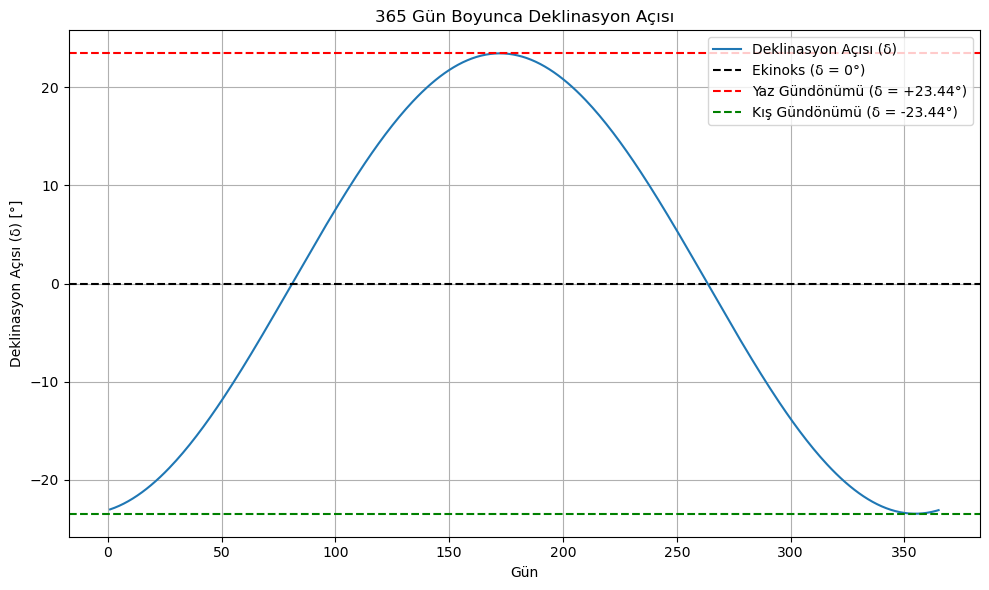

In [1]:
### Deklinasyon Hesabı

import numpy as np
import matplotlib.pyplot as plt

# Deklinasyon açısı hesaplama formülü
def declination_angle(n):
    return 23.44 * np.sin(np.radians((360 / 365) * (n - 81)))

# 1'den 365'e kadar günleri oluştur
days = np.arange(1, 366)

# Deklinasyon açılarını hesapla
declination = declination_angle(days)

# Grafiği oluştur
plt.figure(figsize=(10, 6))
plt.plot(days, declination, label='Deklinasyon Açısı (δ)')
plt.axhline(0, color='black', linestyle='--', label='Ekinoks (δ = 0°)')
plt.axhline(23.44, color='red', linestyle='--', label='Yaz Gündönümü (δ = +23.44°)')
plt.axhline(-23.44, color='green', linestyle='--', label='Kış Gündönümü (δ = -23.44°)')

# Eksen ve grafik özelliklerini ayarla
plt.title('365 Gün Boyunca Deklinasyon Açısı')
plt.xlabel('Gün')
plt.ylabel('Deklinasyon Açısı (δ) [°]')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Grafiği göster
plt.show()


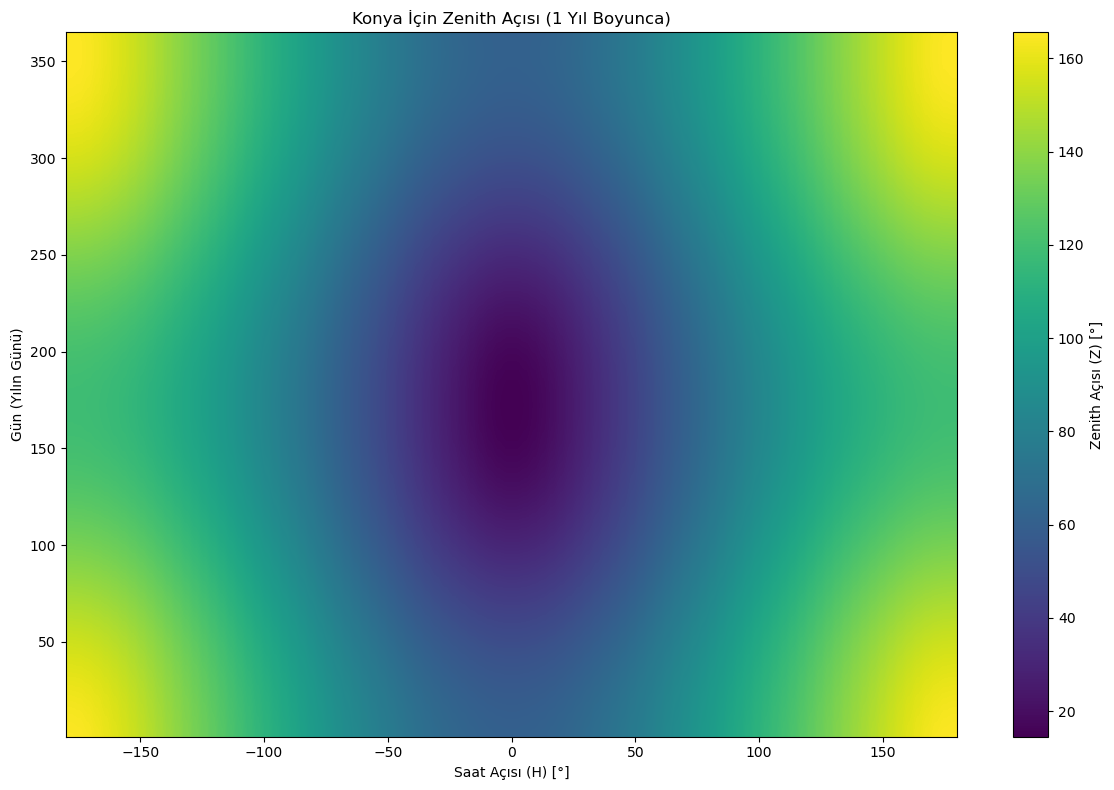

In [4]:

# cos(Z)=sin(ϕ)sin(δ)+cos(ϕ)cos(δ)cos(H)


import numpy as np
import matplotlib.pyplot as plt

# Enlem (Konya için yaklaşık 37.87°)
latitude = 37.87

# Deklinasyon açısı fonksiyonu
def declination_angle(n):
    return 23.44 * np.sin(np.radians((360 / 365) * (n - 81)))

# Zenith açısı hesaplama fonksiyonu
def zenith_angle(latitude, declination, hour_angle):
    latitude_rad = np.radians(latitude)
    declination_rad = np.radians(declination)
    hour_angle_rad = np.radians(hour_angle)
    solar_altitude = np.arcsin(
        np.sin(latitude_rad) * np.sin(declination_rad) +
        np.cos(latitude_rad) * np.cos(declination_rad) * np.cos(hour_angle_rad)
    )
    return 90 - np.degrees(solar_altitude)

# Gün ve saat açıları
days_of_year = np.arange(1, 366)  # 1'den 365'e kadar günler
hour_angles = np.linspace(-180, 180, 100)  # Güneşin doğuşundan batışına kadar saat açıları

# Zenith açısı matrisini oluştur
zenith_matrix = []
for day in days_of_year:
    declination = declination_angle(day)
    zenith_angles = [
        zenith_angle(latitude, declination, h) for h in hour_angles
    ]
    zenith_matrix.append(zenith_angles)

zenith_matrix = np.array(zenith_matrix)

# Isı haritası (heatmap) oluşturma
plt.figure(figsize=(12, 8))
plt.imshow(zenith_matrix, extent=[-180, 180, 1, 365], aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label="Zenith Açısı (Z) [°]")

# Grafik özellikleri
plt.title("Konya İçin Zenith Açısı (1 Yıl Boyunca)")
plt.xlabel("Saat Açısı (H) [°]")
plt.ylabel("Gün (Yılın Günü)")
plt.tight_layout()

# Grafiği göster
plt.show()


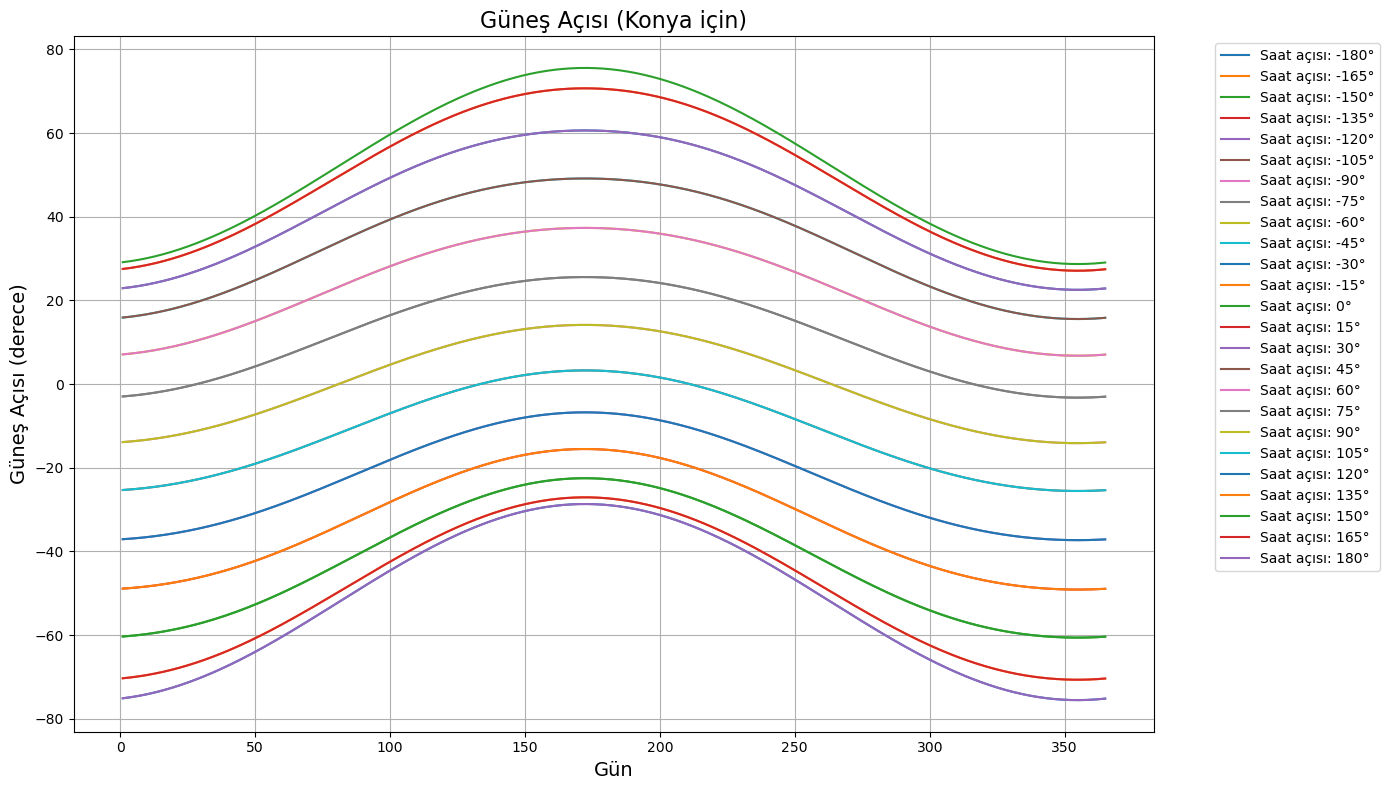

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Enlem (Konya için ortalama enlem)
latitude = 37.875  # derece cinsinden

# Günlerin sayısı
days = np.arange(1, 366)  # 1'den 365'e kadar

# Deklinasyon açısı hesaplama
def declination_angle(n):
    return 23.44 * np.sin(np.radians((360 / 365) * (n - 81)))

# Zenith açısı hesaplama
def zenith_angle(latitude, declination, hour_angle):
    phi = np.radians(latitude)  # Enlem radyan cinsine çevrilir
    delta = np.radians(declination)  # Deklinasyon radyan cinsine çevrilir
    h = np.radians(hour_angle)  # Saat açısı radyan cinsine çevrilir
    cos_z = np.sin(phi) * np.sin(delta) + np.cos(phi) * np.cos(delta) * np.cos(h)
    return np.degrees(np.arccos(cos_z))

# Güneş açısı hesaplama
def solar_angle(zenith):
    return 90 - zenith

# Saat açısını hesaplama (her saat için)
def hour_angles():
    return np.arange(-180, 181, 15)  # -180° ile +180° arasında, her 15° bir saat

# Hesaplamalar ve grafikler
hour_angle_values = hour_angles()
solar_angles = []

for day in days:
    declination = declination_angle(day)
    daily_solar_angles = []
    for h in hour_angle_values:
        zenith = zenith_angle(latitude, declination, h)
        daily_solar_angles.append(solar_angle(zenith))
    solar_angles.append(daily_solar_angles)

# Güneş açısını günlere göre plotlama
plt.figure(figsize=(14, 8))
for i, h in enumerate(hour_angle_values):
    plt.plot(days, [solar_angles[day][i] for day in range(len(days))], label=f'Saat açısı: {h}°')

plt.title("Güneş Açısı (Konya için)", fontsize=16)
plt.xlabel("Gün", fontsize=14)
plt.ylabel("Güneş Açısı (derece)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
pip install ephem numpy


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ----------------------------- ---------- 1.0/1.4 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.5 MB/s eta 0:00:00


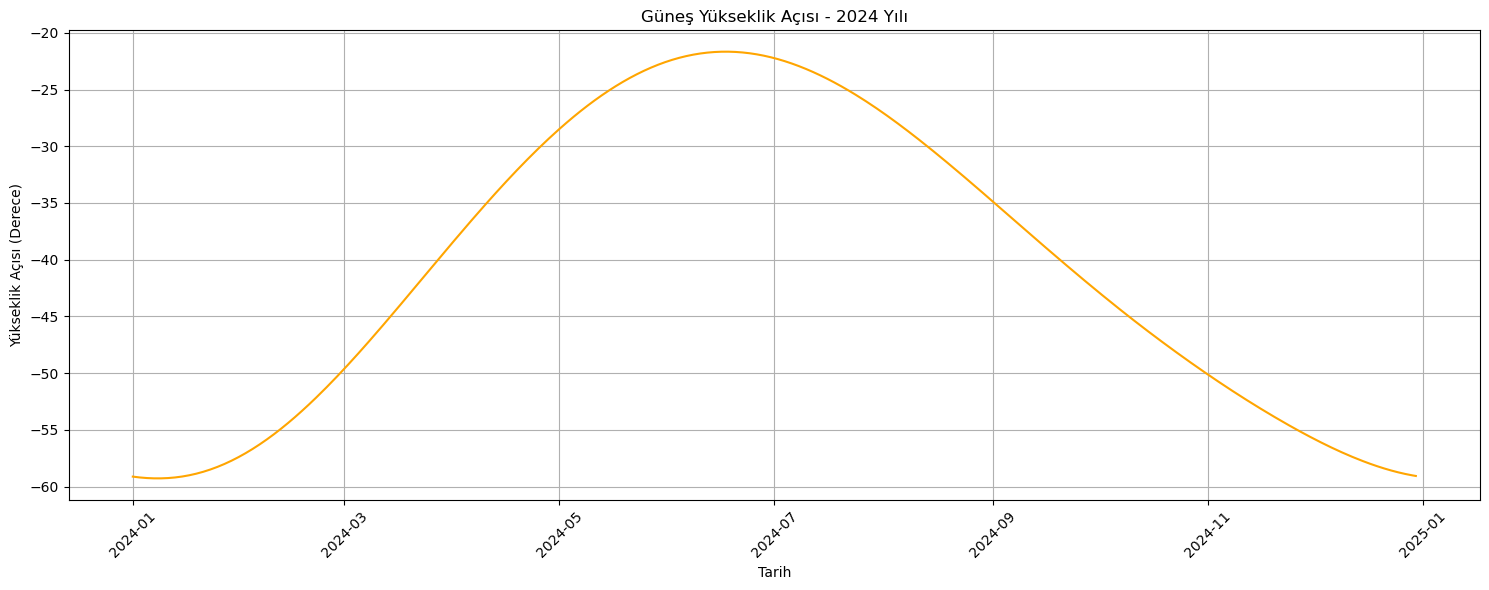

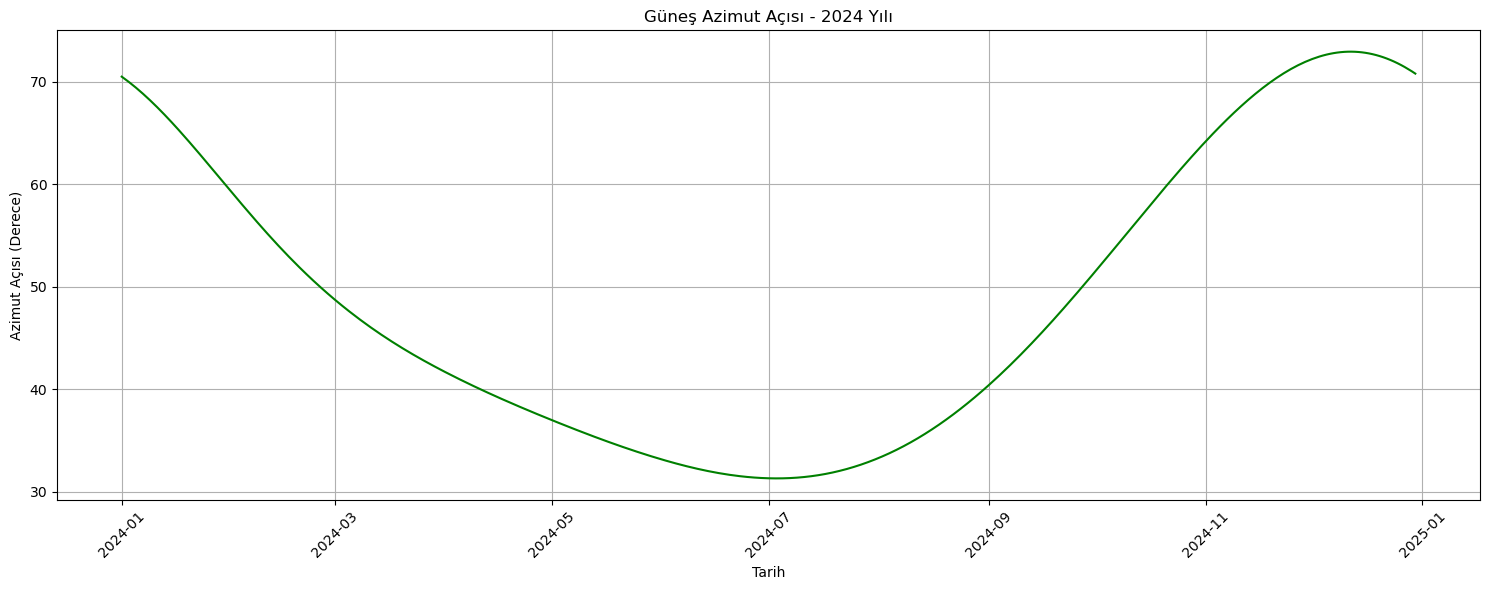

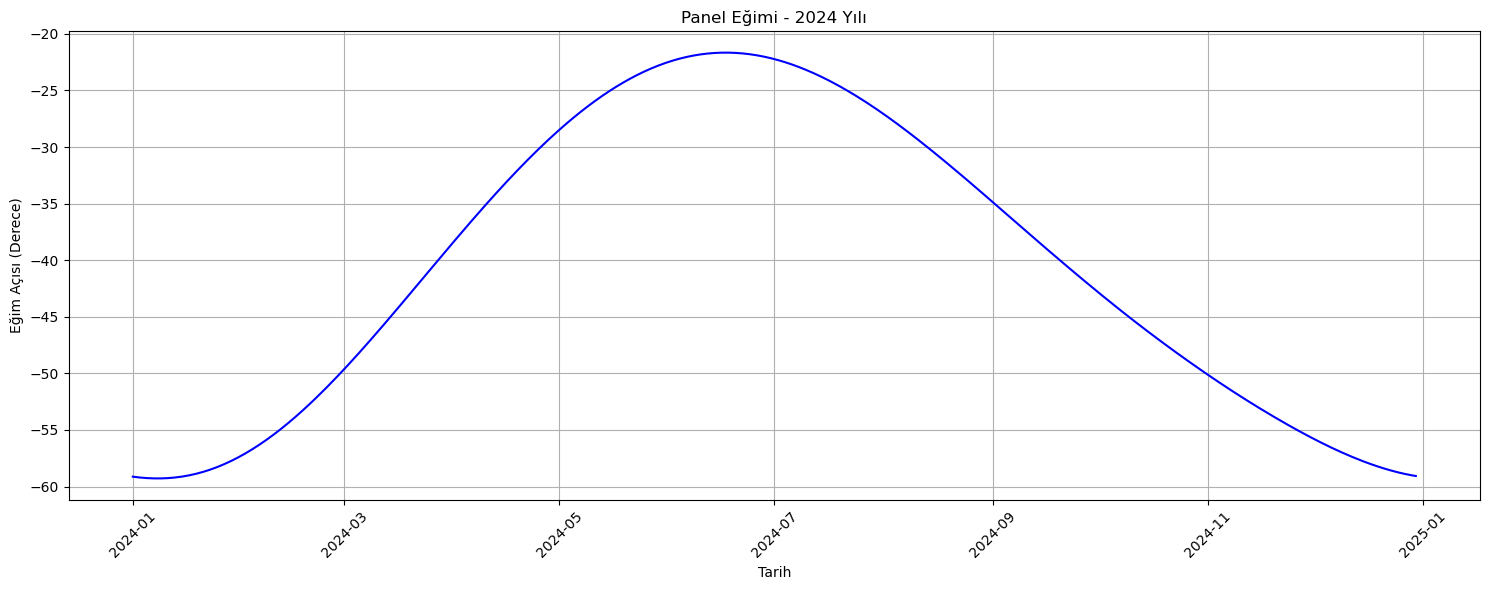

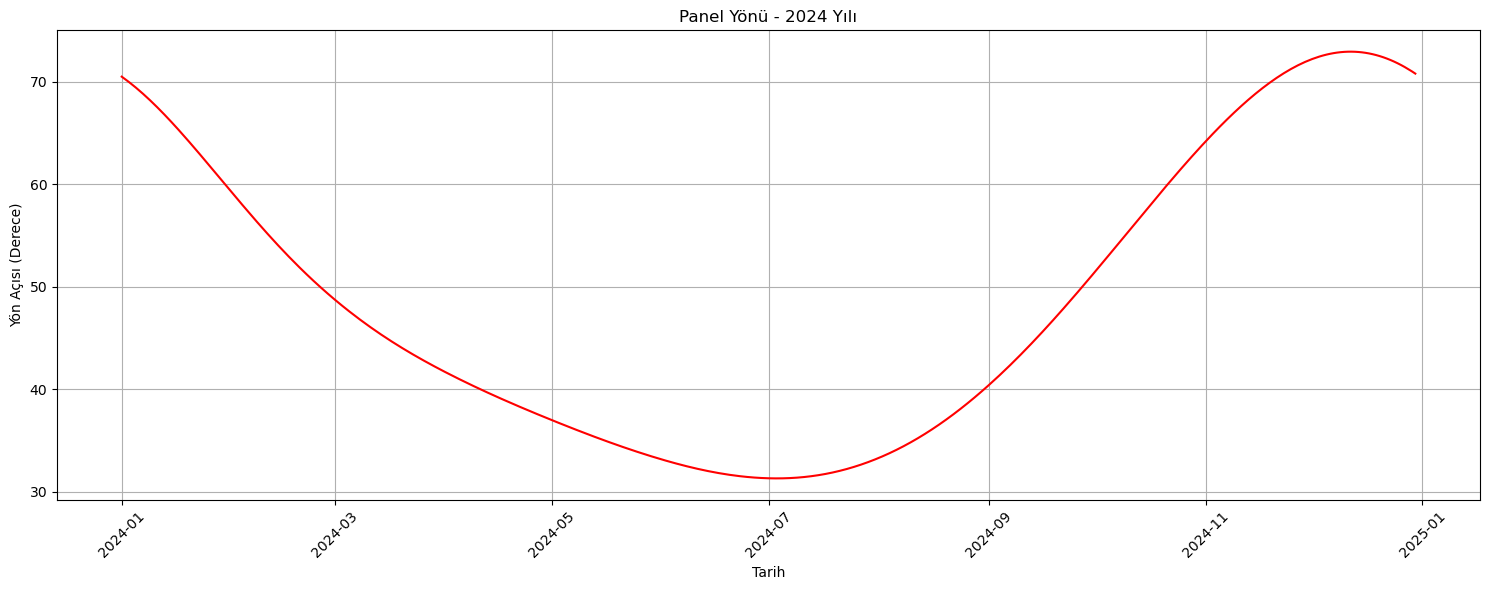

In [22]:
import ephem
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Konya'nın coğrafi koordinatları
latitude = 37.8748  # Enlem (Kuzey Yarımküre)
longitude = 32.4827  # Boylam (Doğu Yarımküre)

# Güneş paneli eğimi için fonksiyon: güneşin yüksekliğine göre dinamik eğim
def dynamic_panel_inclination(latitude, solar_elevation):
    # Güneşin yüksekliği, panelin eğimini belirler (tek eksenli takip)
    return solar_elevation  # Güneşin yüksekliği ile eşleşen panel eğimi

# Güneş paneli yönünü (azimut) güneşin azimutuna göre ayarla
def dynamic_panel_azimuth(solar_azimuth):
    return solar_azimuth  # Güneşin azimut açısına göre panelin yönü ayarlanır

# Güneş yüksekliği ve azimut açısını hesapla
def calculate_solar_angles(date, latitude, longitude):
    observer = ephem.Observer()
    observer.lat = str(latitude)
    observer.lon = str(longitude)
    observer.date = date
    
    sun = ephem.Sun(observer)
    solar_elevation = np.degrees(sun.alt)  # Güneşin yüksekliği (altitude)
    solar_azimuth = np.degrees(sun.az)  # Güneşin azimut açısı
    return solar_elevation, solar_azimuth

# Başlangıç tarihi
start_date = datetime(2024, 1, 1)

# 1 yıl boyunca günlük güneş yüksekliği ve azimut hesaplama
dates = [start_date + timedelta(days=i) for i in range(365)]
elevations = []
azimuths = []
panel_inclinations = []
panel_azimuths = []

for date in dates:
    solar_elevation, solar_azimuth = calculate_solar_angles(date, latitude, longitude)
    panel_inclination = dynamic_panel_inclination(latitude, solar_elevation)
    panel_azimuth = dynamic_panel_azimuth(solar_azimuth)
    
    elevations.append(solar_elevation)
    azimuths.append(solar_azimuth)
    panel_inclinations.append(panel_inclination)
    panel_azimuths.append(panel_azimuth)

# Güneş Yüksekliği Grafiği
plt.figure(figsize=(15, 6))
plt.plot(dates, elevations, label="Güneş Yüksekliği", color='orange')
plt.xlabel("Tarih")
plt.ylabel("Yükseklik Açısı (Derece)")
plt.title("Güneş Yükseklik Açısı - 2024 Yılı")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Güneş Azimut Açısı Grafiği
plt.figure(figsize=(15, 6))
plt.plot(dates, azimuths, label="Güneş Azimut Açısı", color='green')
plt.xlabel("Tarih")
plt.ylabel("Azimut Açısı (Derece)")
plt.title("Güneş Azimut Açısı - 2024 Yılı")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Panel Eğimi Grafiği
plt.figure(figsize=(15, 6))
plt.plot(dates, panel_inclinations, label="Panel Eğimi", color='blue')
plt.xlabel("Tarih")
plt.ylabel("Eğim Açısı (Derece)")
plt.title("Panel Eğimi - 2024 Yılı")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Panel Yönü Grafiği
plt.figure(figsize=(15, 6))
plt.plot(dates, panel_azimuths, label="Panel Yönü", color='red')
plt.xlabel("Tarih")
plt.ylabel("Yön Açısı (Derece)")
plt.title("Panel Yönü - 2024 Yılı")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


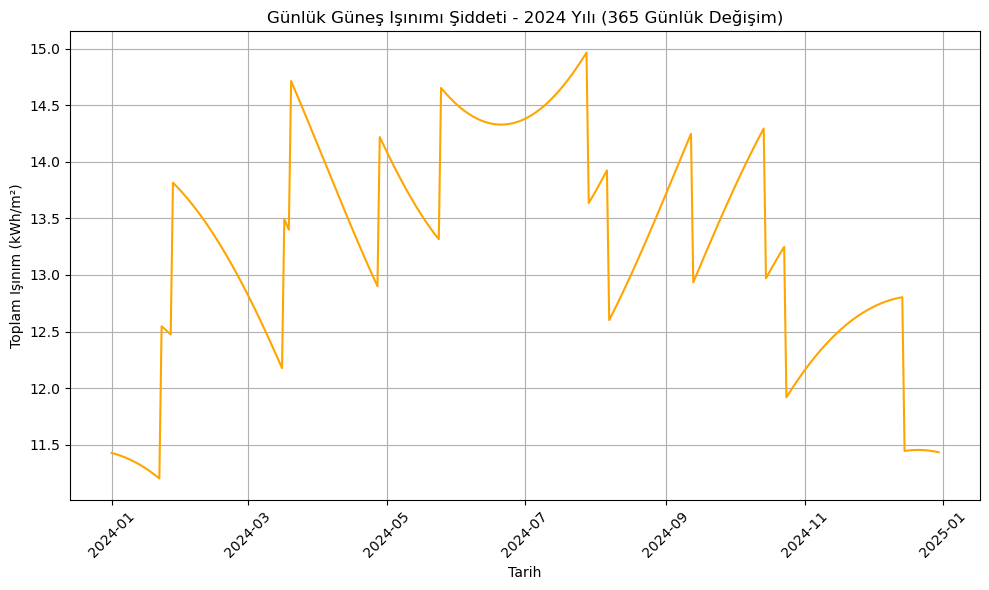

Işımanın en yüksek olduğu günde gerekli panel sayısı: 710728741 panel
Işımanın en düşük olduğu günde gerekli panel sayısı: 949360103 panel


In [15]:
import ephem
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Konya'nın coğrafi koordinatları
latitude = 37.8748  # Enlem (Kuzey Yarımküre)
longitude = 32.4827  # Boylam (Doğu Yarımküre)

# Güneş ışınımı sabiti (W/m²)
I_0 = 1361  # Güneş sabiti

# Güneş yüksekliği açısını hesapla
def calculate_solar_elevation(date, latitude, longitude):
    observer = ephem.Observer()
    observer.lat = str(latitude)
    observer.lon = str(longitude)
    observer.date = date
    
    sun = ephem.Sun(observer)
    solar_elevation = np.degrees(sun.alt)  # Güneşin yüksekliği
    return solar_elevation

# Güneş ışınımı hesaplama (kWh/m² cinsinden)
def calculate_solar_irradiance(solar_elevation):
    if solar_elevation > 0:
        # Güneş ışınımını hesapla (W/m²)
        irradiance = I_0 * np.cos(np.radians(solar_elevation))
        return irradiance / 1000  # kWh/m² (1kW = 1000W)
    else:
        return 0  # Güneş ufkun altındaysa ışınım yok

# Başlangıç tarihi
start_date = datetime(2024, 1, 1)

# 1 yıl boyunca her günün toplam güneş ışınımını hesaplamak
dates = [start_date + timedelta(days=i) for i in range(365)]
daily_irradiances_kWh = []

for date in dates:
    total_irradiance = 0
    # Her gün için saatlik güneş ışınımı hesaplaması
    for hour in range(24):
        # Saatlik gözlem tarihi
        hour_date = date + timedelta(hours=hour)
        solar_elevation = calculate_solar_elevation(hour_date, latitude, longitude)
        solar_irradiance = calculate_solar_irradiance(solar_elevation)
        total_irradiance += solar_irradiance
    # Günlük toplam ışınım (kWh/m²)
    daily_irradiances_kWh.append(total_irradiance)

# Max ve min ışınım değerlerini bulma
max_irradiance = max(daily_irradiances_kWh)
min_irradiance = min(daily_irradiances_kWh)

# Elektrik üretimi ve tüketimi farkı (günlük açık)
total_electricity_gap = 884134000  # kWh (Türkiye'nin günlük elektrik tüketimi)

# Güneş paneli parametreleri
panel_area = 1.63  # m² (CS6P-255P panelinin alanı)
panel_power = 255  # Watt (panel gücü)
panel_efficiency = 0.20  # %20 verimlilik

# Güneş panelinin günlük enerji üretimi (günlük ışınımı max ve min'e göre)
# En yüksek ışınımda (maksimum ışınım)
avg_max_irradiance = max_irradiance  # En yüksek ışınım
daily_panel_output_max = panel_power * panel_efficiency * avg_max_irradiance * panel_area / 1000  # kWh/panel

# En düşük ışınımda (minimum ışınım)
avg_min_irradiance = min_irradiance  # En düşük ışınım
daily_panel_output_min = panel_power * panel_efficiency * avg_min_irradiance * panel_area / 1000  # kWh/panel

# Kaç panel gerektiğini hesapla (günlük açık için)
panels_needed_max = total_electricity_gap / daily_panel_output_max
panels_needed_min = total_electricity_gap / daily_panel_output_min

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))

# Güneş Işınımı Grafiği
plt.plot(dates, daily_irradiances_kWh, label="Günlük Güneş Işınımı Şiddeti (kWh/m²)", color='orange')
plt.xlabel("Tarih")
plt.ylabel("Toplam Işınım (kWh/m²)")
plt.title("Günlük Güneş Işınımı Şiddeti - 2024 Yılı (365 Günlük Değişim)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Hesaplanan panel gereksinimi
print(f"Işımanın en yüksek olduğu günde gerekli panel sayısı: {panels_needed_max:.0f} panel")
print(f"Işımanın en düşük olduğu günde gerekli panel sayısı: {panels_needed_min:.0f} panel")


In [17]:
# Verilen panel sayısı ve alan
panel_count = 949360103  # Panel sayısı
panel_area = 1.63  # Panel başına alan (m²)

# Toplam alan hesaplama
total_area_m2 = panel_count * panel_area  # Toplam alanı m² cinsinden hesapla

# Toplam alanı kilometrekareye çevirme
total_area_km2 = total_area_m2 / 1e6  # 1 km² = 1,000,000 m²

# Sonuçları yazdırma
print(f"Toplam alan: {total_area_m2:.2f} m²")
print(f"Toplam alan: {total_area_km2:.2f} km²")


Toplam alan: 1547456967.89 m²
Toplam alan: 1547.46 km²


In [68]:
# Verilen panel sayısı ve alan
panel_count = 949360103  # Panel sayısı
panel_area = 1.63  # Panel başına alan (m²)
efficiency_increase = 0.30  # Tracking sistemi ile verimlilik artışı (%30)

# Tracking sistemi ile verimlilik artışı sonrası yeni panel sayısı
reduced_panel_count = panel_count * (1 - efficiency_increase)

# Toplam alan hesaplama (Yeni panel sayısı ile)
total_area_m2 = reduced_panel_count * panel_area  # Toplam alanı m² cinsinden hesapla

# Toplam alanı kilometrekareye çevirme
total_area_km2 = total_area_m2 / 1e6  # 1 km² = 1,000,000 m²

# Sonuçları yazdırma
print(f"Tracking sistemi ile yeni panel sayısı: {reduced_panel_count:.0f}")
print(f"Tracking sistemi ile toplam alan: {total_area_m2:.2f} m²")
print(f"Tracking sistemi ile toplam alan: {total_area_km2:.2f} km²")


Tracking sistemi ile yeni panel sayısı: 664552072
Tracking sistemi ile toplam alan: 1083219877.52 m²
Tracking sistemi ile toplam alan: 1083.22 km²


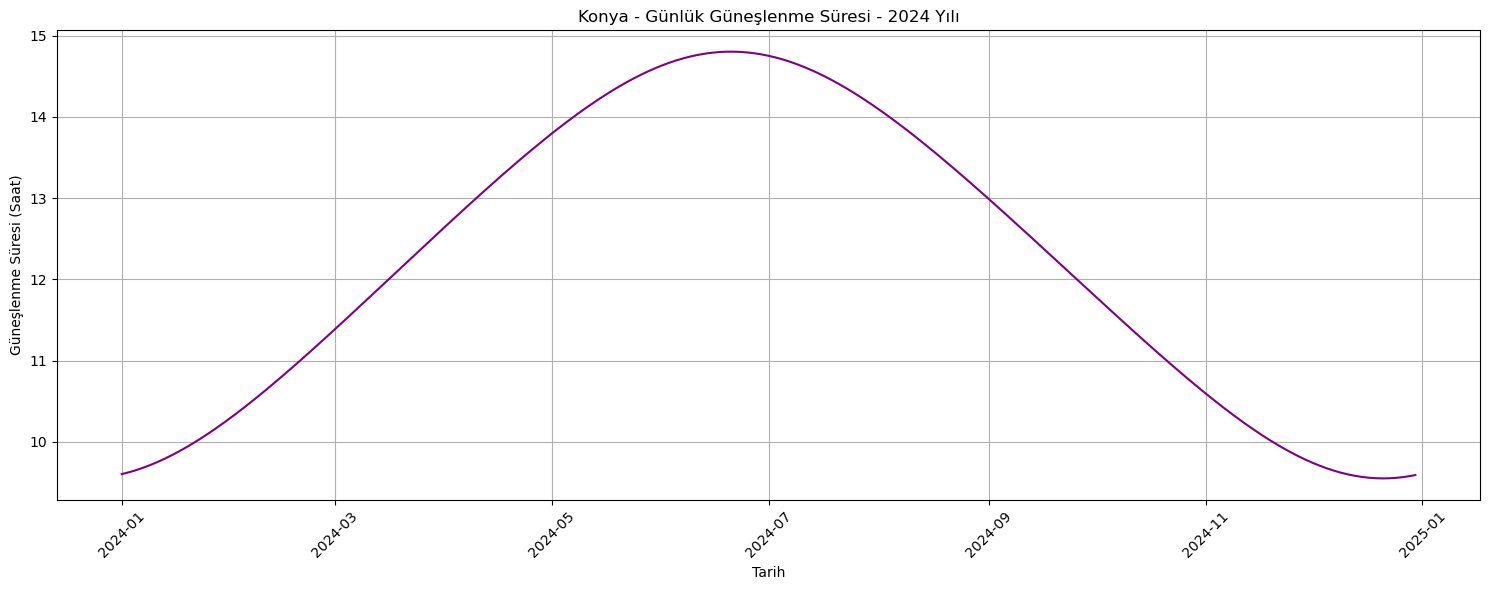

Maksimum Güneşlenme Süresi: 14.80 saat, Tarih: 2024-06-20
Minimum Güneşlenme Süresi: 9.55 saat, Tarih: 2024-12-21


In [24]:
import ephem
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Konya'nın coğrafi koordinatları
latitude = 37.8748  # Enlem (Kuzey Yarımküre)
longitude = 32.4827  # Boylam (Doğu Yarımküre)

# Güneşin doğuş ve batış saatlerini hesapla
def calculate_sunrise_sunset(date, latitude, longitude):
    observer = ephem.Observer()
    observer.lat = str(latitude)
    observer.lon = str(longitude)
    observer.date = date
    
    sun = ephem.Sun(observer)
    
    sunrise = observer.next_rising(sun)  # Güneşin doğuşu
    sunset = observer.next_setting(sun)  # Güneşin batışı
    
    # Zaman farkını hesapla (güneşlenme süresi)
    sunrise_time = ephem.localtime(sunrise)
    sunset_time = ephem.localtime(sunset)
    
    sunlight_duration = sunset_time - sunrise_time  # Güneşlenme süresi
    return sunlight_duration.total_seconds() / 3600  # Saat cinsinden döndür

# Başlangıç tarihi
start_date = datetime(2024, 1, 1)

# 1 yıl boyunca günlük güneşlenme süresi hesaplama
dates = [start_date + timedelta(days=i) for i in range(365)]
sunlight_durations = []

for date in dates:
    sunlight_duration = calculate_sunrise_sunset(date, latitude, longitude)
    sunlight_durations.append(sunlight_duration)

# Güneşlenme Süresi Grafiği
plt.figure(figsize=(15, 6))
plt.plot(dates, sunlight_durations, label="Güneşlenme Süresi", color='purple')
plt.xlabel("Tarih")
plt.ylabel("Güneşlenme Süresi (Saat)")
plt.title("Konya - Günlük Güneşlenme Süresi - 2024 Yılı")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Maksimum ve minimum güneşlenme sürelerini yazdır
max_sunlight_duration = max(sunlight_durations)
min_sunlight_duration = min(sunlight_durations)
max_sunlight_date = dates[sunlight_durations.index(max_sunlight_duration)]
min_sunlight_date = dates[sunlight_durations.index(min_sunlight_duration)]

print(f"Maksimum Güneşlenme Süresi: {max_sunlight_duration:.2f} saat, Tarih: {max_sunlight_date.strftime('%Y-%m-%d')}")
print(f"Minimum Güneşlenme Süresi: {min_sunlight_duration:.2f} saat, Tarih: {min_sunlight_date.strftime('%Y-%m-%d')}")


In [69]:
# Panel sayısı ve panel başına enerji üretimi
panel_count =664552072  # Panel sayısı
panel_power_watt = 255  # Panel başına güç (Watt)
panel_area = 1.63  # Panel başına alan (m²)

# Günlük güneşlenme süresi ve güneş ışığı olmayan saatler
sunshine_hours = 9.55  # Güneşlenme süresi (saat)
no_sunshine_hours = 24 - sunshine_hours  # Güneş ışığı olmayan saatler

# Panel başına enerji üretimi (kWh)
panel_power_kwh = panel_power_watt / 1000  # kWh cinsine çevir (1 W = 0.001 kW)

# Günlük enerji üretimi (kWh)
daily_energy_generation = panel_count * panel_power_kwh * sunshine_hours  # kWh

# Batarya kapasitesi (günlük ihtiyacı karşılamak için)
battery_capacity_needed = daily_energy_generation * (no_sunshine_hours / sunshine_hours)

# Sonuçları yazdırma
print(f"Günlük enerji üretimi: {daily_energy_generation:.2f} kWh")
print(f"Batarya kapasitesi: {battery_capacity_needed:.2f} kWh")


Günlük enerji üretimi: 1618350433.34 kWh
Batarya kapasitesi: 2448708247.30 kWh


In [70]:
# Batarya enerji yoğunluğu ve hücre alanı
battery_energy_density = 150  # Li-ion batarya enerji yoğunluğu (Wh/kg)
battery_cell_area = 0.01 * 0.01  # Ortalama batarya hücresi alanı (m²)

# Gerekli batarya kapasitesi (kWh)
battery_capacity_kwh = battery_capacity_needed  # Daha önce hesaplanmış batarya kapasitesi

# Batarya kapasitesini Wh cinsine çevirme
battery_capacity_wh = battery_capacity_kwh * 1000  # kWh'den Wh'ye çevrildi

# Gerekli batarya ağırlığını hesaplama (kg cinsinden)
battery_weight_needed = battery_capacity_wh / battery_energy_density  # kg

# Batarya hücre sayısı (her batarya 150 Wh kapasitesinde)
battery_cells_needed = battery_capacity_wh / 150  # Hücre başına kapasite 150 Wh

# Batarya alanı hesaplama
total_battery_area = battery_cells_needed * battery_cell_area  # m² cinsinden toplam alan

# Batarya maliyet hesaplama
battery_cost_per_kwh = 150  # Ortalama batarya maliyeti (USD/kWh)
total_battery_cost = battery_capacity_kwh * battery_cost_per_kwh  # Toplam maliyet

# Regülatör kapasitesi (Batarya kapasitesinin 1.2 katı alınır)
regulator_capacity_needed = battery_capacity_kwh * 1.2  # Regülatör kapasitesi (kWh)

# Regülatör alanı hesaplama (regülatör başına ortalama 0.5 m² alan)
regulator_area_per_unit = 0.5  # Regülatör başına alan (m²)
total_regulator_area = regulator_capacity_needed * regulator_area_per_unit  # m²

# Regülatör maliyeti (Ortalama maliyet)
regulator_cost_per_kwh = 100  # Ortalama regülatör maliyeti (USD/kWh)
total_regulator_cost = regulator_capacity_needed * regulator_cost_per_kwh  # Toplam maliyet

# Sonuçları yazdırma
print(f"Toplam batarya kapasitesi: {battery_capacity_kwh:.2f} kWh")
print(f"Gerekli batarya ağırlığı: {battery_weight_needed:.2f} kg")
print(f"Batarya hücre sayısı: {battery_cells_needed:.2f} hücre")
print(f"Toplam batarya alanı: {total_battery_area / 1e6:.2f} km²")
print(f"Toplam batarya maliyeti: {total_battery_cost:.2f} USD")

print(f"\nRegülatör kapasitesi: {regulator_capacity_needed:.2f} kWh")
print(f"Toplam regülatör alanı: {total_regulator_area/ 1e6:.2f} km²")
print(f"Toplam regülatör maliyeti: {total_regulator_cost:.2f} USD")


Toplam batarya kapasitesi: 2448708247.30 kWh
Gerekli batarya ağırlığı: 16324721648.68 kg
Batarya hücre sayısı: 16324721648.68 hücre
Toplam batarya alanı: 1.63 km²
Toplam batarya maliyeti: 367306237095.30 USD

Regülatör kapasitesi: 2938449896.76 kWh
Toplam regülatör alanı: 1469.22 km²
Toplam regülatör maliyeti: 293844989676.24 USD


In [59]:
# İnvörtör verimliliği ve maliyet faktörleri
invertor_efficiency = 0.98  # %98 verimlilik
area_per_kw = 0.05  # 1 kW için alan (m²)
cost_per_kw = 300  # 1 kW için maliyet (USD)

# İnvörtör kapasitesini hesaplama
invertor_capacity_kw = daily_energy_generation / invertor_efficiency

# İnvörtör alanını hesaplama
invertor_area_m2 = invertor_capacity_kw * area_per_kw

# İnvörtör maliyetini hesaplama
invertor_cost_usd = invertor_capacity_kw * cost_per_kw

# Sonuçları yazdırma
print(f"İnvörtör Kapasitesi: {invertor_capacity_kw:.2f} kW")
print(f"İnvörtör Alanı: {invertor_area_m2 / 1e6:.2f} km²")
print(f"İnvörtör Maliyeti: {invertor_cost_usd:.2f} USD")

İnvörtör Kapasitesi: 1651377993.20 kW
İnvörtör Alanı: 82.57 km²
İnvörtör Maliyeti: 495413397960.61 USD


In [60]:
# Panel başına güç (W)
panel_power_w = 255  # 255W

# Panel sayısı
panel_count = 664552072

# Güneş ışınım süresi (saat/gün)
sunlight_hours = 9.55  # Güneş ışınımı süresi, örneğin 6 saat

# İnvörtör verimliliği (%)
inverter_efficiency = 0.95  # %95 verimlilik

# Toplam güç (W)
total_power_w = panel_count * panel_power_w

# Toplam güç (kW)
total_power_kw = total_power_w / 1000  # kW cinsinden

# Günlük enerji üretimi (kWh)
daily_production_kwh = total_power_kw * sunlight_hours

# İnvörtör gücü (kW)
inverter_power_kw = total_power_kw / inverter_efficiency

# Sonuçları yazdırma
print(f"Toplam Panel Gücü: {total_power_kw:.2f} kW")
print(f"Günlük Enerji Üretimi: {daily_production_kwh:.2f} kWh")
print(f"İnvörtör Gücü: {inverter_power_kw:.2f} kW")


Toplam Panel Gücü: 169460778.36 kW
Günlük Enerji Üretimi: 1618350433.34 kWh
İnvörtör Gücü: 178379766.69 kW


In [61]:
panel_power_watt = 255  # Panel başına güç (Watt)
panel_count = 664552072 # Panel sayısı
sunshine_hours = 9.55  # Güneşlenme süresi (saat)

# Panel başına enerji üretimi (kWh)
panel_power_kwh = panel_power_watt / 1000  # kWh cinsine çevir (1 W = 0.001 kW)

# Günlük enerji üretimi (kWh)
daily_energy_generation = panel_count * panel_power_kwh * sunshine_hours


In [62]:
panel_power_watt = 255  # Panel başına güç (Watt)
panel_count = 949360103  # Panel sayısı
sunshine_hours = 9.55  # Güneşlenme süresi (saat)

# Panel başına enerji üretimi (kWh)
panel_power_kwh = panel_power_watt / 1000  # kWh cinsine çevir (1 W = 0.001 kW)

# Günlük enerji üretimi (kWh)
daily_energy_generation = panel_count * panel_power_kwh * sunshine_hours


In [63]:
no_sunshine_hours = 24 - sunshine_hours  # Güneş ışığı olmayan saatler
battery_capacity_needed = daily_energy_generation * (no_sunshine_hours / sunshine_hours)


In [64]:
# Gereken enerji
required_energy_with_efficiency = battery_capacity_needed / 0.9


In [65]:
required_energy_with_efficiency

3886838488.3658333